# Data Inspection and Sentiment Analysis for Reddit Data #
In this notebook we explore lexical and affective content of Reddit posts relted to  

First we import neccessary libraries (libraries are tools/collections of code written by other researchers &/or Developers)

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import os

Read data from `dat` directory

In [3]:
df = pd.read_csv("dat_reddit/comments.csv")

Show the number of rows (one row pr. post) and columns (one variable pr. column)

In [4]:
rows, columns = df.shape
print(f"[INFO] {rows} comments and {columns} variables")

[INFO] 1200 comments and 3 variables


Inspect the first n rows

In [5]:
n = 5
df.head(n)

,author,body,created
0,[deleted],[removed],2020-05-31 03:59:58
1,[deleted],[removed],2020-05-31 04:00:39
2,[deleted],[deleted],2020-05-31 04:00:49
3,aloneinorbit-,So you mean all the idiots trying to convince ...,2020-05-31 04:01:26
4,PotRoastPotato,"&gt;Joe Lockhart, the former NFL vice presiden...",2020-05-31 04:03:44


Extract descriptive statistics for the data set

In [6]:
df.describe()

,author,body,created
count,1200,1200,1200
unique,624,1080,1193
top,[deleted],[removed],2020-05-31 13:08:59
freq,121,115,2


Let us clean the data, by removing posts that have been `removed`

### Preprocessesing ###

In [7]:
df = df[df.body != "[removed]"]

And `deleted`

In [8]:
df = df[df.body != "[deleted]"]

Show number of rows and columns after data clearning

In [9]:
rows, columns = df.shape
print(f"[INFO] {rows} comments and {columns} variables")

[INFO] 1079 comments and 3 variables


and descriptive statistics after clearning

In [10]:
df.describe()

,author,body,created
count,1079,1079,1079
unique,623,1078,1074
top,PotRoastPotato,QB rating is not the be-all-end-all... But mos...,2020-05-31 13:08:59
freq,30,2,2


## Sentiment analysis ##
Now let us do sentiment analysis of each post. Sentiment analysis is the use of of __natural language processing__, __text analysis__, __computational linguistics__, and __biometrics__ to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is often used in opnion mining and semantic analysis. In this example we use `VADER`. VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER sentiment analysis belongs to a class of sentiment analysis tools that relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. For more information about VADER read: Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. [PDF](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109). If you are interested in the underlying codebase see [vaderSentiment](https://github.com/cjhutto/vaderSentiment).

In [11]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

Inspect polarity of the ith comment

In [13]:
i = 10
sentiment_analyzer_scores(df.body[i])

The truth is he wasn't good enough to outweigh the drama. It's as simple as that {'neg': 0.129, 'neu': 0.748, 'pos': 0.123, 'compound': -0.0274}


In [15]:
for (i, content) in enumerate(df.body[:1]):
    print(sentiment_analyzer_scores(content))
    print(f"[INFO] comment {i} >>> ")
    print(content.lstrip())

So you mean all the idiots trying to convince us it was about football were full of shit?

Color me shocked. Well way to go, guys. Ignoring peaceful protests and even ridiculing it like Kaepernick got us here {'neg': 0.255, 'neu': 0.557, 'pos': 0.188, 'compound': -0.5423}
None
[INFO] comment 0 >>> 
So you mean all the idiots trying to convince us it was about football were full of shit?

Color me shocked. Well way to go, guys. Ignoring peaceful protests and even ridiculing it like Kaepernick got us here


## Export data ##
Write posts to individual files for analysis in [Voyant Tools](https://voyant-tools.org/)

In [16]:
for (i, content) in enumerate(df.body.values):
    fname = os.path.join("dat_reddit", "files", str(i) + "_" + df.author.values[i] + ".txt")
    with open(fname, "w") as f:
        print(content, file=f)

In [17]:
def sentiment_extractor(sentence):
    return  analyser.polarity_scores(sentence)

data = list()
for (i, content) in enumerate(df.body):
    scores = sentiment_extractor(content)
    data.append([content, df.author.values[i], scores["neg"], scores["neu"], scores["pos"], scores["compound"]])

data = pd.DataFrame(data, columns=["body", "author", "negative", "neutral", "positive", "compound"])
data.to_csv(os.path.join("dat_reddit", "comments_sentiment.csv"), index=False)

## Descriptive statistics ##

In [18]:
data.describe()

,negative,neutral,positive,compound
count,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.114279,0.776142,0.109599,-0.017658
std,0.118704,0.146677,0.112432,0.535227
min,0.000000,0.198000,0.000000,-0.992700
25%,0.000000,0.694000,0.000000,-0.476700
50%,0.089000,0.785000,0.090000,0.000000
75%,0.171000,0.871000,0.167000,0.422900
max,0.717000,1.000000,0.744000,0.987100


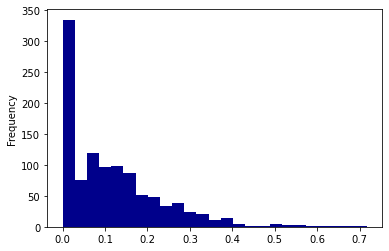

In [34]:
ax0 = data.negative.plot.hist(bins=25,color="DarkBlue")

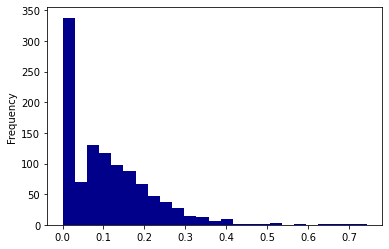

In [33]:
ax1 = data.positive.plot.hist(bins=25,color="DarkBlue")

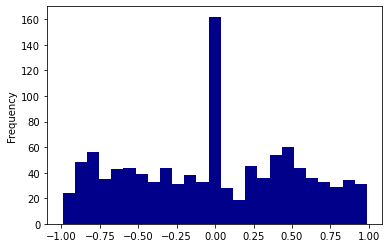

In [31]:
ax3 = data["compound"].plot.hist(bins=25,color="DarkBlue")

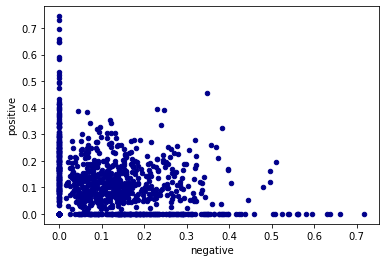

In [32]:
ax1 = data.plot.scatter(x="negative",
                          y="positive",
                          color="DarkBlue")

In [39]:
data.corr()

,negative,neutral,positive,compound
negative,1.000000,-0.659453,-0.195438,-0.647887
neutral,-0.659453,1.000000,-0.608363,0.086320
positive,-0.195438,-0.608363,1.000000,0.571406
compound,-0.647887,0.086320,0.571406,1.000000


In [38]:
data.positive.corr(data.negative)

-0.19543790834426872

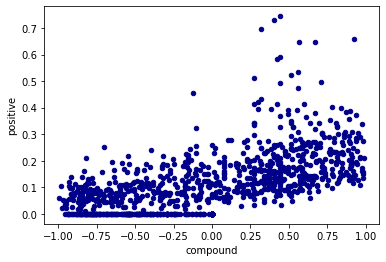

In [40]:
ax2 = data.plot.scatter(x="compound",
                          y="positive",
                          color="DarkBlue")

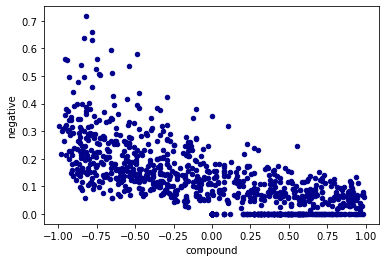

In [19]:
ax2 = data.plot.scatter(x="compound",
                          y="negative",
                          color="DarkBlue")

## Explore author distribution